## Project_Title: Student_Performance_Prediction

## Description:
In this project we aim to make prediction on student performance using a Machine Learning model based on the features such as gender, race ethnicity, parental level of education, lunch, test preparation course, math score, reading score, writing score, total score and average score. 

## Dataset Description
The dataset provides a comprehensive information student performance prediction with 10 column names. 

- Gender: The gender of student where 0 represent Male and 1 represent Female
- Race_Ethnicity: The category of students ethnicity which is grouped in A, B, C, D & E.
- Parental_Level_of_Educaton: The parents' education.
- Lunch: it determines whether a student had lunch or not. the 0 represent "No Lunch" and 1 represent "Had Lunch"
- Test_Preparation_Course: Students enrollment in test preparation course where 0 represent a student who did not enroll in a test preparation course and 1 would represent a student who did enroll in a test preparation course. 
- Math_Score: the score students had in mathematics
- Reading_Score: the score students had in Reading
- Writing_Score: The score had in Writing
- Total_Score: The sum of math_score,reading_score and writing_score
- Average_Score: the total score divied by the number subject taken. Eg: total_score/3

NB: The dataset contains 1000 rows and 10 columns
## Goal
Analyze the data and make prediction using the various models on student prefornce and identify the factors that significatly influence it.

## Importing Libraries

In [48]:
## Libraries for Loading and Overview
import pandas as pd
import numpy as np

## Libraries for Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

## Libraries for ml algorithms
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor

## Libraries for categorical Encoding
from sklearn.feature_extraction import DictVectorizer

## Libraries for Accuracy
from sklearn.metrics import root_mean_squared_error

## Data Loading and Overview

In [2]:
## Preview the dataset
data = pd.read_csv("Dataset/Cleaned_Students_Performance.csv")

## copy the dataset
df = data.copy()
df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,0,group B,bachelor's degree,1,0,72,72,74,218,72.666667
1,0,group C,some college,1,1,69,90,88,247,82.333333
2,0,group B,master's degree,1,0,90,95,93,278,92.666667
3,1,group A,associate's degree,0,0,47,57,44,148,49.333333
4,1,group C,some college,1,0,76,78,75,229,76.333333
...,...,...,...,...,...,...,...,...,...,...
995,0,group E,master's degree,1,1,88,99,95,282,94.000000
996,1,group C,high school,0,0,62,55,55,172,57.333333
997,0,group C,high school,0,1,59,71,65,195,65.000000
998,0,group D,some college,1,1,68,78,77,223,74.333333


In [3]:
## preview the first 10 rows 
df.head(10)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,0,group B,bachelor's degree,1,0,72,72,74,218,72.666667
1,0,group C,some college,1,1,69,90,88,247,82.333333
2,0,group B,master's degree,1,0,90,95,93,278,92.666667
3,1,group A,associate's degree,0,0,47,57,44,148,49.333333
4,1,group C,some college,1,0,76,78,75,229,76.333333
5,0,group B,associate's degree,1,0,71,83,78,232,77.333333
6,0,group B,some college,1,1,88,95,92,275,91.666667
7,1,group B,some college,0,0,40,43,39,122,40.666667
8,1,group D,high school,0,1,64,64,67,195,65.000000
9,0,group B,high school,0,0,38,60,50,148,49.333333


In [4]:
## preview the last 10 rows
df.tail(10)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
990,1,group E,high school,0,1,86,81,75,242,80.666667
991,0,group B,some high school,1,1,65,82,78,225,75.000000
992,0,group D,associate's degree,0,0,55,76,76,207,69.000000
993,0,group D,bachelor's degree,0,0,62,72,74,208,69.333333
994,1,group A,high school,1,0,63,63,62,188,62.666667
995,0,group E,master's degree,1,1,88,99,95,282,94.000000
996,1,group C,high school,0,0,62,55,55,172,57.333333
997,0,group C,high school,0,1,59,71,65,195,65.000000
998,0,group D,some college,1,1,68,78,77,223,74.333333
999,0,group D,some college,0,0,77,86,86,249,83.000000


In [5]:
## Transpose the dataset
df.T

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
gender,0,0,0,1,1,0,0,1,1,0,...,1,0,0,0,1,0,1,0,0,0
race_ethnicity,group B,group C,group B,group A,group C,group B,group B,group B,group D,group B,...,group E,group B,group D,group D,group A,group E,group C,group C,group D,group D
parental_level_of_education,bachelor's degree,some college,master's degree,associate's degree,some college,associate's degree,some college,some college,high school,high school,...,high school,some high school,associate's degree,bachelor's degree,high school,master's degree,high school,high school,some college,some college
lunch,1,1,1,0,1,1,1,0,0,0,...,0,1,0,0,1,1,0,0,1,0
test_preparation_course,0,1,0,0,0,0,1,0,1,0,...,1,1,0,0,0,1,0,1,1,0
math_score,72,69,90,47,76,71,88,40,64,38,...,86,65,55,62,63,88,62,59,68,77
reading_score,72,90,95,57,78,83,95,43,64,60,...,81,82,76,72,63,99,55,71,78,86
writing_score,74,88,93,44,75,78,92,39,67,50,...,75,78,76,74,62,95,55,65,77,86
total_score,218,247,278,148,229,232,275,122,195,148,...,242,225,207,208,188,282,172,195,223,249
average_score,72.666667,82.333333,92.666667,49.333333,76.333333,77.333333,91.666667,40.666667,65.0,49.333333,...,80.666667,75.0,69.0,69.333333,62.666667,94.0,57.333333,65.0,74.333333,83.0


## Understanding the Dataset

In [6]:
## Check for the info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   int64  
 1   race_ethnicity               1000 non-null   object 
 2   parental_level_of_education  1000 non-null   object 
 3   lunch                        1000 non-null   int64  
 4   test_preparation_course      1000 non-null   int64  
 5   math_score                   1000 non-null   int64  
 6   reading_score                1000 non-null   int64  
 7   writing_score                1000 non-null   int64  
 8   total_score                  1000 non-null   int64  
 9   average_score                1000 non-null   float64
dtypes: float64(1), int64(7), object(2)
memory usage: 78.3+ KB


In [7]:
## Check for the total number of rows and columns
r = df.shape[0]
c = df.shape[1]
print(f'Total Numbers of Rows: {r}\nTotal NUmbers of Columns: {c}')

Total Numbers of Rows: 1000
Total NUmbers of Columns: 10


In [8]:
## Check for the uniqueness of the dataset
for each_name in df.columns:
    print(each_name)
    print(df[each_name])

gender
0      0
1      0
2      0
3      1
4      1
      ..
995    0
996    1
997    0
998    0
999    0
Name: gender, Length: 1000, dtype: int64
race_ethnicity
0      group B
1      group C
2      group B
3      group A
4      group C
        ...   
995    group E
996    group C
997    group C
998    group D
999    group D
Name: race_ethnicity, Length: 1000, dtype: object
parental_level_of_education
0       bachelor's degree
1            some college
2         master's degree
3      associate's degree
4            some college
              ...        
995       master's degree
996           high school
997           high school
998          some college
999          some college
Name: parental_level_of_education, Length: 1000, dtype: object
lunch
0      1
1      1
2      1
3      0
4      1
      ..
995    1
996    0
997    0
998    1
999    0
Name: lunch, Length: 1000, dtype: int64
test_preparation_course
0      0
1      1
2      0
3      0
4      0
      ..
995    1
996    0
997  

In [9]:
## Check for the missing values
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
total_score                    0
average_score                  0
dtype: int64

In [10]:
## Check for duplicated valued
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

## Data Preprocessing

In [11]:
## Changing the Gender columns from 0 and 1 to male and female
df["gender"] = df["gender"].replace(0 , "Male")
df["gender"] = df["gender"].replace(1 , "Female")

## Changing the Gender columns from 0 and 1 to male and female
df["lunch"] = df["lunch"].replace(0 , "No Order")
df["lunch"] = df["lunch"].replace(1 , "Ordered")

## Changing the Gender columns from 0 and 1 to male and female
df["test_preparation_course"] = df["test_preparation_course"].replace(0 , "Not Enrolled")
df["test_preparation_course"] = df["test_preparation_course"].replace(1 , "Enrolled")

In [12]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,Male,group B,bachelor's degree,Ordered,Not Enrolled,72,72,74,218,72.666667
1,Male,group C,some college,Ordered,Enrolled,69,90,88,247,82.333333
2,Male,group B,master's degree,Ordered,Not Enrolled,90,95,93,278,92.666667
3,Female,group A,associate's degree,No Order,Not Enrolled,47,57,44,148,49.333333
4,Female,group C,some college,Ordered,Not Enrolled,76,78,75,229,76.333333


In [13]:
## Check for the datatypes
df.dtypes

gender                          object
race_ethnicity                  object
parental_level_of_education     object
lunch                           object
test_preparation_course         object
math_score                       int64
reading_score                    int64
writing_score                    int64
total_score                      int64
average_score                  float64
dtype: object

In [14]:
df["average_score"].round()

0      73.0
1      82.0
2      93.0
3      49.0
4      76.0
       ... 
995    94.0
996    57.0
997    65.0
998    74.0
999    83.0
Name: average_score, Length: 1000, dtype: float64

In [15]:
df.head().round()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,Male,group B,bachelor's degree,Ordered,Not Enrolled,72,72,74,218,73.0
1,Male,group C,some college,Ordered,Enrolled,69,90,88,247,82.0
2,Male,group B,master's degree,Ordered,Not Enrolled,90,95,93,278,93.0
3,Female,group A,associate's degree,No Order,Not Enrolled,47,57,44,148,49.0
4,Female,group C,some college,Ordered,Not Enrolled,76,78,75,229,76.0


In [16]:
## convert the columns with object data types to category data type
df["gender"] = df["gender"].astype("category")
df["race_ethnicity"] = df["race_ethnicity"].astype("category")
df["parental_level_of_education"] = df["parental_level_of_education"].astype("category")
df["lunch"] = df["lunch"].astype("category")
df["test_preparation_course"] = df["test_preparation_course"].astype("category")

In [17]:
df.dtypes

gender                         category
race_ethnicity                 category
parental_level_of_education    category
lunch                          category
test_preparation_course        category
math_score                        int64
reading_score                     int64
writing_score                     int64
total_score                       int64
average_score                   float64
dtype: object

## Exploratory Data Analysis

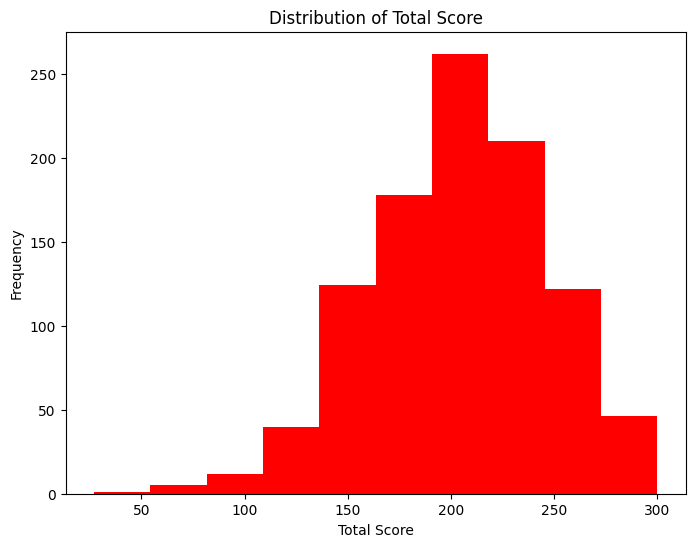

In [18]:
## Explore the Columns of the data
## using histogram for the distribution of Race Ethnicity
plt.figure(figsize = (8,6))
plt.hist(df["total_score"], color = "red", bins = 10)
plt.title("Distribution of Total Score")
plt.xlabel("Total Score")
plt.ylabel("Frequency")
plt.show()

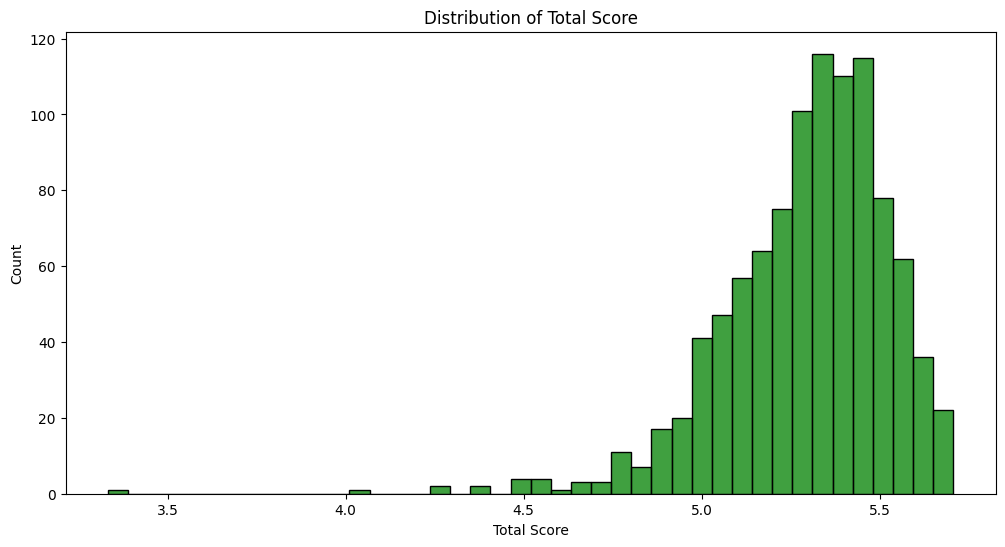

In [19]:
## Using Log Transformation
## Normalizing the Skewed data
log_total = np.log1p(df["total_score"])

plt.figure(figsize = (12,6))
sns.histplot(log_total, color='green')
plt.title('Distribution of Total Score')
plt.xlabel('Total Score')
plt.ylabel('Count')
plt.show()

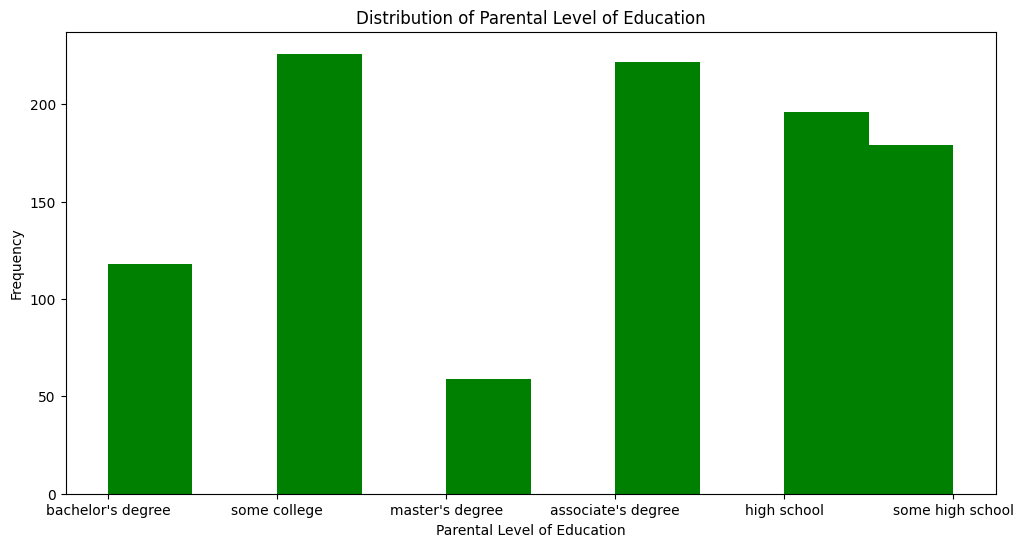

In [20]:
## Explore the Columns of the data
## using histogram for the distribution of Parental Level of Education
plt.figure(figsize = (12,6))
plt.hist(df["parental_level_of_education"], color = "green", bins = 10)
plt.title("Distribution of Parental Level of Education")
plt.xlabel("Parental Level of Education")
plt.ylabel("Frequency")
plt.show()

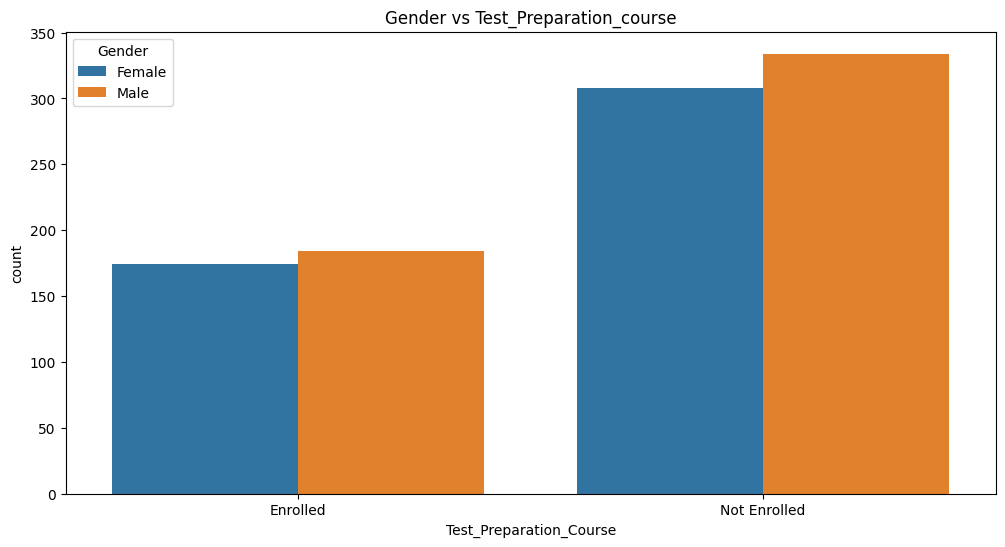

In [21]:
## Using seaborn and countplot for the distribution
## Comparing the gender of the students and test preparation course
plt.figure(figsize = (12,6))
sns.countplot(x = "test_preparation_course", hue = "gender", data = df)
plt.title("Gender vs Test_Preparation_course")
plt.xlabel("Test_Preparation_Course")
plt.ylabel("count")
plt.legend(title = "Gender")
plt.show()

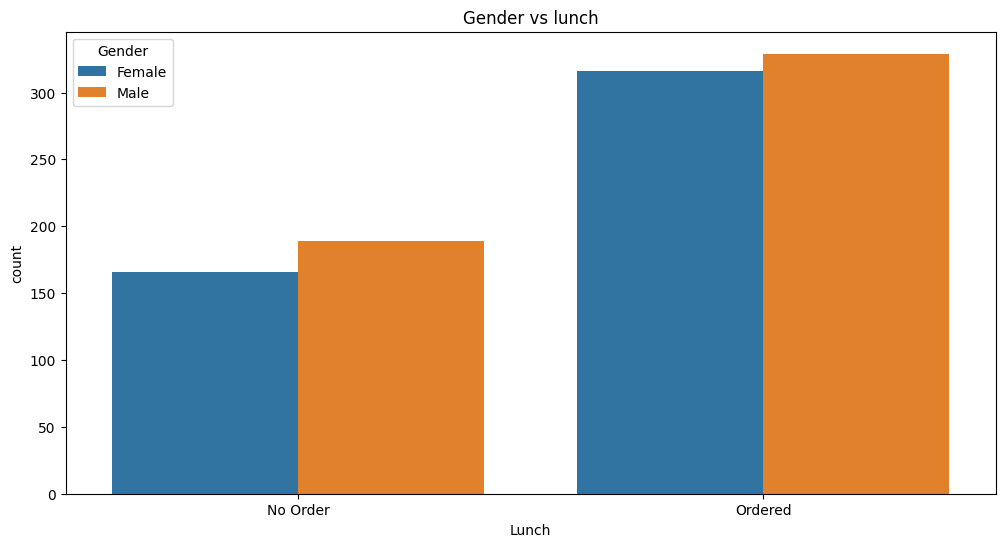

In [22]:
## Using seaborn and countplot for the distribution
## Comparing the gender of the students and test preparation course
plt.figure(figsize = (12,6))
sns.countplot(x = "lunch", hue = "gender", data = df)
plt.title("Gender vs lunch")
plt.xlabel("Lunch")
plt.ylabel("count")
plt.legend(title = "Gender")
plt.show()


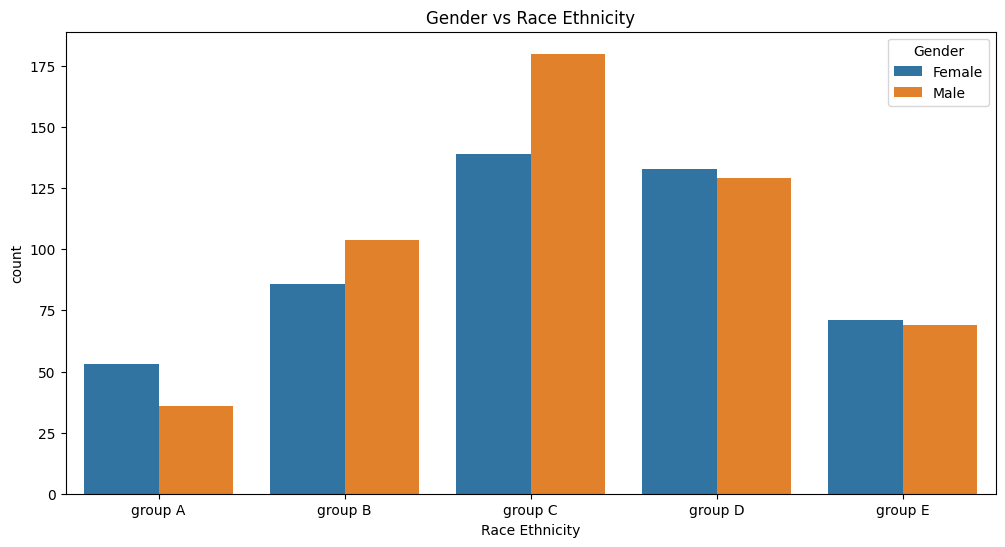

In [23]:
## Using seaborn and countplot for the distribution
## Comparing the gender of the students and test preparation course
plt.figure(figsize = (12,6))
sns.countplot(x = "race_ethnicity", hue = "gender", data = df)
plt.title("Gender vs Race Ethnicity")
plt.xlabel("Race Ethnicity")
plt.ylabel("count")
plt.legend(title = "Gender")
plt.show()


In [24]:
## checking for math_score by the gender with its value counts
df.groupby('math_score')['gender'].value_counts()

math_score  gender
0           Male      1
            Female    0
8           Male      1
            Female    0
18          Male      1
                     ..
98          Male      1
99          Male      2
            Female    1
100         Female    4
            Male      3
Name: count, Length: 162, dtype: int64

In [25]:
## checking for writing_score by the gender with its value counts
df.groupby('writing_score')['gender'].value_counts()

writing_score  gender
10             Male       1
               Female     0
15             Female     1
               Male       0
19             Female     1
                         ..
98             Female     0
99             Male       3
               Female     1
100            Male      13
               Female     1
Name: count, Length: 154, dtype: int64

In [26]:
## checking for reading_score by the gender with its value counts
df.groupby('reading_score')['gender'].value_counts()

reading_score  gender
17             Male       1
               Female     0
23             Female     1
               Male       0
24             Female     1
                         ..
97             Female     1
99             Male       3
               Female     0
100            Male      14
               Female     3
Name: count, Length: 144, dtype: int64

## Descriptive Analysis

In [28]:
## Statistical Summary
df.describe().round()

,math_score,reading_score,writing_score,total_score,average_score
count,1000.0,1000.0,1000.0,1000.0,1000.0
mean,66.0,69.0,68.0,203.0,68.0
std,15.0,15.0,15.0,43.0,14.0
min,0.0,17.0,10.0,27.0,9.0
25%,57.0,59.0,58.0,175.0,58.0
50%,66.0,70.0,69.0,205.0,68.0
75%,77.0,79.0,79.0,233.0,78.0
max,100.0,100.0,100.0,300.0,100.0


## Correlation Analysis

In [29]:
## the correlation result for the target variable against other numeric values
num_cols = df.select_dtypes(include = ['int','float'])
num_cols

,math_score,reading_score,writing_score,total_score,average_score
0,72,72,74,218,72.666667
1,69,90,88,247,82.333333
2,90,95,93,278,92.666667
3,47,57,44,148,49.333333
4,76,78,75,229,76.333333
...,...,...,...,...,...
995,88,99,95,282,94.000000
996,62,55,55,172,57.333333
997,59,71,65,195,65.000000
998,68,78,77,223,74.333333


In [30]:
corr_num = num_cols.corr()
corr_num

,math_score,reading_score,writing_score,total_score,average_score
math_score,1.000000,0.817580,0.802642,0.918746,0.918746
reading_score,0.817580,1.000000,0.954598,0.970331,0.970331
writing_score,0.802642,0.954598,1.000000,0.965667,0.965667
total_score,0.918746,0.970331,0.965667,1.000000,1.000000
average_score,0.918746,0.970331,0.965667,1.000000,1.000000


In [31]:
corr_num['average_score']

math_score       0.918746
reading_score    0.970331
writing_score    0.965667
total_score      1.000000
average_score    1.000000
Name: average_score, dtype: float64

## Building a validation framework
- Training dataset 60%
- Validation dataset 20%
- Testing dataset 20%

In [32]:
df_train_full, df_test = train_test_split(df, test_size = 0.2, random_state = 10)
df_train, df_valid = train_test_split(df_train_full, test_size = 0.25, random_state = 10)

print(f'Size of Training Dataset:{len(df_train)}')
print(f'Size of Validation Dataset: {len(df_valid)}')
print(f'Size of Testing Dataset: {len(df_test)}')

Size of Training Dataset:600
Size of Validation Dataset: 200
Size of Testing Dataset: 200


In [33]:
## Select the target variable from the Dataframe
y_train = df_train['average_score']
y_valid = df_valid['average_score']

In [34]:
## Delete the target variable from the Dataframe
del df_train['average_score']
del df_valid['average_score']

In [35]:
df_train.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score
771,Female,group D,bachelor's degree,Ordered,Not Enrolled,75,73,74,222
508,Female,group C,master's degree,Ordered,Not Enrolled,79,78,77,234
909,Female,group E,bachelor's degree,Ordered,Enrolled,70,64,70,204
687,Female,group D,associate's degree,No Order,Not Enrolled,77,78,73,228
615,Male,group C,high school,Ordered,Not Enrolled,60,68,72,200


## Data Preprocessing 2

In [36]:
## Converting the dataframe into a vector
## Normalize the target variable

y_train = np.log1p(y_train).values 
y_valid = np.log1p(y_valid).values 

In [37]:
#Select columns with int, float and categorial data 
df_train_bl = df_train.select_dtypes(include=['int64', 'float64', 'category'])
df_valid_bl = df_valid.select_dtypes(include=['int64', 'float64', 'category'])

In [38]:
# convert the dataframe to a dictionary format
dict_train_bl = df_train_bl.to_dict(orient='records')
dict_valid_bl = df_valid_bl.to_dict(orient='records') 

# create an instance of dv
dv = DictVectorizer(sparse=False)

dv.fit(dict_train_bl)

DictVectorizer(sparse=False)

In [39]:
X_train_bl = dv.transform(dict_train_bl)
X_valid_bl = dv.transform(dict_valid_bl)

## Training A Baseline Algorithms
- LinearRegression
- ExtraTreesRegressor
- RandomForestRegressor

In [40]:
## creating an instance of a regression 
lr_model = LinearRegression() 

## fit the data to model 
lr_model.fit(X_train_bl, y_train)

LinearRegression()

## Model Evaluation

In [41]:
## generate validation predictions on the validation set  
y_valid_pred = lr_model.predict(X_valid_bl)

In [42]:
## measure the accuracy 
lr_rmse_bl = root_mean_squared_error(y_valid, y_valid_pred) 

print(f'Baseline Validation Metric: {lr_rmse_bl}')  

print(f'Baseline Validation Metric: {round(lr_rmse_bl, 2) * 100} %')    # Specify to round it to two decimal places 

Baseline Validation Metric: 0.04135125320447448
Baseline Validation Metric: 4.0 %


## ExtraTrees Regressor

In [44]:
## Training the decisiontree regressor
etr_model = ExtraTreesRegressor(random_state = 11)
## fit the data to the model
etr_model.fit(X_train_bl,y_train)

ExtraTreesRegressor(random_state=11)

In [45]:
# generate validation prediction 
y_valid_pred = etr_model.predict(X_valid_bl)

# Chekcing for accuracy 
etr_rmse = root_mean_squared_error(y_valid, y_valid_pred) 
print(f'Extra Tress Baseline Validation Metric: {round(etr_rmse, 2) * 100} %')

Extra Tress Baseline Validation Metric: 2.0 %


## RandomForest Regressor

In [46]:
## Training RandomForest Regressor
rfr_model = RandomForestRegressor(random_state = 11)

## fit the data to the model
rfr_model.fit(X_train_bl, y_train)

RandomForestRegressor(random_state=11)

In [47]:
## generate validation prediction
y_valid_pred = rfr_model.predict(X_valid_bl)

## Check for accuracy
rfr_rmse = root_mean_squared_error(y_valid, y_valid_pred)
print(f'Random Forest Basline Validation Metric: {round(rfr_rmse,2)*100}%')

Random Forest Basline Validation Metric: 2.0%


## DecisionTree Regressor

In [49]:
## Training RandomForest Regressor
dtr_model =DecisionTreeRegressor(random_state = 11)

## fit the data to the model
dtr_model.fit(X_train_bl, y_train)

DecisionTreeRegressor(random_state=11)

In [50]:
## generate validation prediction
y_valid_pred = dtr_model.predict(X_valid_bl)

## Check for accuracy
dtr_rmse = root_mean_squared_error(y_valid, y_valid_pred)
print(f'Random Forest Basline Validation Metric: {round(dtr_rmse,2)*100}%')

Random Forest Basline Validation Metric: 15.0%


## GradientBoosting Regressor

In [54]:
## Training RandomForest Regressor
gbr_model =GradientBoostingRegressor(random_state = 11)

## fit the data to the model
gbr_model.fit(X_train_bl, y_train)

GradientBoostingRegressor(random_state=11)

In [55]:
## Generate validation Prediction
y_valid_pred = gbr_model.predict(X_valid_bl)

## Check for accuracy
gbr_rmse = root_mean_squared_error(y_valid, y_valid_pred)
print(f'Random Forest Basline Validation Metric: {round(gbr_rmse,2)*100}%')

Random Forest Basline Validation Metric: 3.0%


## Training and Testing the Final Model

In [59]:
df_train_fm = df_train_full.select_dtypes(include=['int64', 'float64', 'category'])
df_test_fm = df_test.select_dtypes(include=['int64', 'float64', 'category'])

#Normalise and transform to a vector
y_train_fm = np.log1p(df_train_full['average_score']).values 
y_test_fm = np.log1p(df_test['average_score']).values 

# del target column from dataset 
del df_train_fm['average_score']
del df_test_fm['average_score']

# convert the dataframe to a dictionary format
dict_train_fm = df_train_fm.to_dict(orient='records')
dict_test_fm = df_test_fm.to_dict(orient='records') 

# training a dictVector
dv = DictVectorizer(sparse=False)
dv.fit(dict_train_fm)

# transform to matrix format
X_train_fm = dv.transform(dict_train_fm)
X_test_fm = dv.transform(dict_test_fm)

# creating an instance of a regression 
etr_model_fm = ExtraTreesRegressor(random_state=11)

# training the model
etr_model_fm.fit(X_train_fm, y_train_fm)

# generate validation predictions on the test set  
y_test_pred_fm = etr_model_fm.predict(X_test_fm)

## measure the accuracy 
etr_rmse_fm = root_mean_squared_error(y_test_fm, y_test_pred_fm) 

print(f'Extra Trees Model Final Test Metric: {round(etr_rmse_fm, 5) * 100} %')    # Specify to round it to five decimal places 

Extra Trees Model Final Test Metric: 1.172 %


## Saving the Model

In [60]:
import pickle 
with open('Student_Performance_Prediction.bin', 'wb') as f_out: 
    pickle.dump((dv, etr_model_fm), f_out) 

##  Loading the Model


In [61]:
with open('Student_Performance_Prediction.bin', 'rb') as f_in:
    dv.model = pickle.load(f_in)

In [62]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,Male,group B,bachelor's degree,Ordered,Not Enrolled,72,72,74,218,72.666667
1,Male,group C,some college,Ordered,Enrolled,69,90,88,247,82.333333
2,Male,group B,master's degree,Ordered,Not Enrolled,90,95,93,278,92.666667
3,Female,group A,associate's degree,No Order,Not Enrolled,47,57,44,148,49.333333
4,Female,group C,some college,Ordered,Not Enrolled,76,78,75,229,76.333333


## Making Prediction

In [63]:
student_data = {
 'gender': "Male",
 'race_ethnicity':"group B",
 'parental_level_of_education': "bachelor's degree",
 'lunch': "ordered",
 'test_preparation_course': 'Not Enrolled',
 'math_score': 72,
 'reading_score': 72,
 'writing_score': 74,
 'total_score': 218,
 'average_score': 72.666667,
 }


In [65]:
## lets create a function to make a single prediction 
def predict_single(df, dv, etr_model_fm):
    X = dv.transform([student_data])
    y_pred = etr_model_fm.predict(X)[0]
    return y_pred

## lets call the function to make the prediction 
prediction = predict_single(student_data, dv, etr_model_fm)

## output the value of the prediction 
print(f"Predicted Student Performance: {prediction.round(3)}")

Predicted Student Performance: 4.3
